#### Assumptions made/issues/observations found, please review and advise: 

####   Well header dataset
      -Assumed 'Not Applicable' values as null values. See Line 2 of Code. Agreed
      -Changed some objects to category data types. See line 7 of Code. Waiting for confirmation.
      -Columns dropped. See Line 20 of Code. Waiting for confirmation.
      -BH Longitude/Latitude values missing and they correspond to British Columbia data. See corresponding html file and          Line 3 of code.
      
####    Production dataset - Require review and input
      -Duplicate rows.
      
####    Perforation dataset
      -ActivityType column values(46) missing. See corresponding html file and Line 17 of code.
      -Added a Completion Activity (Yes or No) column to the perforation dataset. See Line 18 and 19.

     

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import sweetviz as sv
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\ijeke\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## Get the data

In [2]:
## add list of datecolumns to parse_date to ensure datetime datatypes
## assumed 'Not Applicable' values are NA values

datecolumns = ['LicenceDate', 'ConfidentialReleaseDate','AbandonDate', 'SurfAbandonDate', 'SpudDate', 'FinalDrillDate', 'RigReleaseDate','StatusDate','CompletionDate']   
well_header = pd.read_csv(r"C:\Users\ijeke\Documents\Datathon\Complete set\WellHeader_Datathon.csv",parse_dates=datecolumns, low_memory=False, na_values='Not Applicable')
well_production = pd.read_csv(r"C:\Users\ijeke\Documents\Datathon\Complete set\WellProduction.csv", parse_dates=['ProdPeriod'])
perf_treatment = pd.read_csv(r"C:\Users\ijeke\Documents\Datathon\Complete set\PerfTreatments.csv", parse_dates=['ActivityDate'])

In [3]:
well_header=well_header.iloc[:,0:85]
well_header.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10437 entries, 0 to 10436
Data columns (total 85 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   EPAssetsId                 10437 non-null  int64         
 1   Province                   10437 non-null  object        
 2   LicenceNumber              10437 non-null  object        
 3   UWI                        10437 non-null  object        
 4   CurrentOperator            10437 non-null  object        
 5   CurrentOperatorParent      10437 non-null  int64         
 6   CurrentOperatorParentName  10437 non-null  object        
 7   Licensee                   10437 non-null  object        
 8   LicenseeParentCompany      10437 non-null  int64         
 9   LicenseeParentCompanyName  10437 non-null  object        
 10  LicenceDate                10437 non-null  datetime64[ns]
 11  CurrentStatus              10437 non-null  object        
 12  Curr

In [4]:
display(well_production.info())

print('\n')

perf_treatment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961054 entries, 0 to 961053
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   EPAssetsId        961054 non-null  int64         
 1   ProdPeriod        961054 non-null  datetime64[ns]
 2   ProdType          961054 non-null  object        
 3   Volume            961054 non-null  float64       
 4   WellHeader.Match  961054 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 36.7+ MB


None



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445271 entries, 0 to 445270
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   EPAssetsId         445271 non-null  int64         
 1   EPAPTId            445271 non-null  int64         
 2   ObservationNumber  370719 non-null  float64       
 3   ActivityDate       445271 non-null  datetime64[ns]
 4   ActivityType       445225 non-null  object        
 5   IntervalTop        445271 non-null  float64       
 6   IntervalBase       445271 non-null  float64       
 7   PerfShots          370719 non-null  float64       
 8   WellHeader.Match   445271 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 30.6+ MB


In [5]:
well_header.head(2)

,EPAssetsId,Province,LicenceNumber,UWI,CurrentOperator,CurrentOperatorParent,CurrentOperatorParentName,Licensee,LicenseeParentCompany,LicenseeParentCompanyName,...,PSACAreaCode,PSACAreaName,ProjectedDepth,StatusDate,StatusSource,UnitID,UnitName,UnitFlag,Municipality,CompletionDate
0,2587301,Alberta,475898,100122706624W500,Enerplus Corporation,267,Enerplus Corporation,Enerplus Corporation,267,Enerplus Corporation,...,AB2,Foothills Front,3800.0,2016-02-28,AER,NaN,NaN,No,NaN,NaT
1,2593278,Alberta,479407,102052706624W500,Enerplus Corporation,267,Enerplus Corporation,Enerplus Corporation,267,Enerplus Corporation,...,AB2,Foothills Front,3700.0,2016-09-23,AER,NaN,NaN,No,NaN,NaT


In [6]:
##check which columns are object datatypes 

well_header.columns[well_header.dtypes == 'object']



Index(['Province', 'LicenceNumber', 'UWI', 'CurrentOperator',
       'CurrentOperatorParentName', 'Licensee', 'LicenseeParentCompanyName',
       'CurrentStatus', 'CurrentStatusStandardised', 'WellType',
       'WellTypeStandardised', 'WellName', 'Formation', 'Field', 'Pool',
       'SurveySystem', 'Surf_Location', 'Surf_Meridian', 'Surf_TownshipRange',
       'Surf_QuarterUnit', 'Surf_Block', 'Surf_NTSMapSheet', 'Surf_Area',
       'Surf_QuarterSection', 'BH_Location', 'BH_TownshipRange',
       'BH_QuarterUnit', 'BH_Block', 'BH_NTSMapSheet', 'BH_Area',
       'BH_QuarterSection', 'BH_Meridian', 'LaheeClass', 'Confidential',
       'SurfaceOwner', 'OSArea', 'DrillingContractor', 'WellProfile',
       'Country', 'RegulatoryAgency', 'PSACAreaCode', 'PSACAreaName',
       'StatusSource', 'UnitID', 'UnitName', 'UnitFlag', 'Municipality'],
      dtype='object')

In [7]:
## Select objects to convert to category type 
obj_cast_category = ['Province', 'CurrentOperator', 'CurrentOperatorParentName',
       'Licensee', 'LicenseeParentCompanyName', 'CurrentStatus',
       'CurrentStatusStandardised', 'WellType', 'WellTypeStandardised',
       'Formation', 'Field', 'Pool', 'SurveySystem',
       'Surf_Meridian', 
       'Surf_QuarterUnit',  'Surf_Block', 'Surf_NTSMapSheet',
       'Surf_Area',  'Surf_QuarterSection',
       'BH_Location', 'BH_QuarterUnit', 
       'BH_Block', 'BH_NTSMapSheet', 'BH_Area', 
       'BH_QuarterSection', 'BH_Meridian', 'LaheeClass', 'Confidential',
       'SurfaceOwner', 'OSArea', 'OSDeposit', 'DrillingContractor',
       'WellProfile', 'Country', 'RegulatoryAgency', 'PSACAreaCode',
       'PSACAreaName', 'StatusSource', 'UnitFlag','Municipality']       


well_header[obj_cast_category] = well_header[obj_cast_category].astype('category')

well_header.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10437 entries, 0 to 10436
Data columns (total 85 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   EPAssetsId                 10437 non-null  int64         
 1   Province                   10437 non-null  category      
 2   LicenceNumber              10437 non-null  object        
 3   UWI                        10437 non-null  object        
 4   CurrentOperator            10437 non-null  category      
 5   CurrentOperatorParent      10437 non-null  int64         
 6   CurrentOperatorParentName  10437 non-null  category      
 7   Licensee                   10437 non-null  category      
 8   LicenseeParentCompany      10437 non-null  int64         
 9   LicenseeParentCompanyName  10437 non-null  category      
 10  LicenceDate                10437 non-null  datetime64[ns]
 11  CurrentStatus              10437 non-null  category      
 12  Curr

In [8]:
# change ProdType and ActivityType columns from object to category datatype
well_production['ProdType'] = well_production['ProdType'].astype('category')
perf_treatment['ActivityType'] = perf_treatment['ActivityType'].astype('category')

## Seewtviz Magic

In [9]:
 wh= sv.analyze(well_header)

:FEATURES DONE:                    |█████████████████████| [100%]   00:14  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:26  -> (00:00 left)


Creating Associations graph... DONE!


In [10]:
wh.show_html('wells.html')

Report wells.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


In [11]:
well_production=well_production.iloc[:,0:4]

In [12]:
well_production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961054 entries, 0 to 961053
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   EPAssetsId  961054 non-null  int64         
 1   ProdPeriod  961054 non-null  datetime64[ns]
 2   ProdType    961054 non-null  category      
 3   Volume      961054 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(1), int64(1)
memory usage: 22.9 MB


In [13]:
 wp= sv.analyze(well_production)

:FEATURES DONE:                    |█████████████████████| [100%]   00:01  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:21  -> (00:00 left)


Creating Associations graph... DONE!


In [14]:
wp.show_html('wells_production.html')

Report wells_production.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


In [15]:
perf_treatment=perf_treatment.iloc[:,0:8]

In [16]:
perf_treatment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445271 entries, 0 to 445270
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   EPAssetsId         445271 non-null  int64         
 1   EPAPTId            445271 non-null  int64         
 2   ObservationNumber  370719 non-null  float64       
 3   ActivityDate       445271 non-null  datetime64[ns]
 4   ActivityType       445225 non-null  category      
 5   IntervalTop        445271 non-null  float64       
 6   IntervalBase       445271 non-null  float64       
 7   PerfShots          370719 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(4), int64(2)
memory usage: 24.2 MB


In [17]:
perf_treatment['ActivityType'].unique()

[Perforation, Fracture, Hydraulic Fracture, Sand Fracture, Open Hole, ..., Packing Device Capped w/Cement, Chemical Squeeze, Casing Patch, Acid Treatment, Multi-Stage Fracture]
Length: 26
Categories (25, object): [Perforation, Fracture, Hydraulic Fracture, Sand Fracture, ..., Chemical Squeeze, Casing Patch, Acid Treatment, Multi-Stage Fracture]

In [18]:
## create perf activity type dictionary to classify as Completion Activity (Yes or No) based on our assumptions and intrepretation for the different perftreatment['ActivityType'].
perf_activity_dict = {'Perforation': 'Yes',
 'Fracture': 'Yes',
 'Hydraulic Fracture': 'Yes',
 'Sand Fracture': 'Yes',
 'Open Hole': 'No',
 'Chemical Fracture': 'Yes',
 'Other' : 'No',
 'Acid Squeeze' : 'Yes',
 'Bridge Plug Set' : 'No',
 'Acid Wash' : 'Yes',
 'Acidize' : 'Yes',
 'Remedial' : 'Yes',
 'Cement Squeeze' : 'Yes',
'Hydra Jet Perforation': 'Yes',
 'Slotted Liner' : 'Yes',
 'Open Hole/Barefoot Completion' : 'No',
 'Remedial Casing Cementing' : 'No',
 'Cement Plug' : 'Yes',
 'Multi-Stage Fracture - Port Closed': 'Yes',
 'Bridge Plug - No Cement' : 'No',
 'Packing Device Capped w/Cement' : 'Yes',
 'Chemical Squeeze': 'Yes',
 'Casing Patch' : 'No',
 'Acid Treatment' : 'Yes',
 'Multi-Stage Fracture': 'Yes'}

print(perf_activity_dict)


{'Perforation': 'Yes', 'Fracture': 'Yes', 'Hydraulic Fracture': 'Yes', 'Sand Fracture': 'Yes', 'Open Hole': 'No', 'Chemical Fracture': 'Yes', 'Other': 'No', 'Acid Squeeze': 'Yes', 'Bridge Plug Set': 'No', 'Acid Wash': 'Yes', 'Acidize': 'Yes', 'Remedial': 'Yes', 'Cement Squeeze': 'Yes', 'Hydra Jet Perforation': 'Yes', 'Slotted Liner': 'Yes', 'Open Hole/Barefoot Completion': 'No', 'Remedial Casing Cementing': 'No', 'Cement Plug': 'Yes', 'Multi-Stage Fracture - Port Closed': 'Yes', 'Bridge Plug - No Cement': 'No', 'Packing Device Capped w/Cement': 'Yes', 'Chemical Squeeze': 'Yes', 'Casing Patch': 'No', 'Acid Treatment': 'Yes', 'Multi-Stage Fracture': 'Yes'}


In [19]:
# merge new table to existing perftreatment table
perf_treatment['CompletionActivity'] = perf_treatment['ActivityType'].map(perf_activity_dict)

In [20]:
pt=sv.analyze(perf_treatment)

:FEATURES DONE:                    |█████████████████████| [100%]   00:03  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:04  -> (00:00 left)


Creating Associations graph... DONE!


In [21]:
pt.show_html('perf_treatment.html')


Report perf_treatment.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


In [22]:
perf_treatment.head()

,EPAssetsId,EPAPTId,ObservationNumber,ActivityDate,ActivityType,IntervalTop,IntervalBase,PerfShots,CompletionActivity
0,2598013,3679026,2.0,2017-01-19,Perforation,2263.0,2263.5,20.0,Yes
1,2599020,3680087,2.0,2017-01-18,Perforation,1435.0,1435.5,20.0,Yes
2,2585063,3681132,2.0,2015-02-14,Perforation,1794.0,1794.5,20.0,Yes
3,2589680,3682967,2.0,2015-11-08,Perforation,1878.0,1878.5,20.0,Yes
4,2590441,3695025,2.0,2016-08-09,Perforation,1957.0,1957.5,20.0,Yes


In [23]:
perf_treatment['CompletionActivity'] = perf_treatment['CompletionActivity'].astype('category')

perf_treatment['CompletionActivity'].unique()

[Yes, No, NaN]
Categories (2, object): [Yes, No]

In [24]:
perf_treatment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445271 entries, 0 to 445270
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   EPAssetsId          445271 non-null  int64         
 1   EPAPTId             445271 non-null  int64         
 2   ObservationNumber   370719 non-null  float64       
 3   ActivityDate        445271 non-null  datetime64[ns]
 4   ActivityType        445225 non-null  category      
 5   IntervalTop         445271 non-null  float64       
 6   IntervalBase        445271 non-null  float64       
 7   PerfShots           370719 non-null  float64       
 8   CompletionActivity  445225 non-null  category      
dtypes: category(2), datetime64[ns](1), float64(4), int64(2)
memory usage: 24.6 MB


## Create subsets of Perf Treatment to obtain wells which have Completion Activity as Yes, No or NaN

In [25]:
perf_treatment_subset = perf_treatment[['EPAssetsId', 'CompletionActivity', 'ActivityDate']]

perf_treatment_subset_null_values = perf_treatment_subset[pd.isnull(perf_treatment_subset['CompletionActivity'])]

perf_treatment_subset2 = perf_treatment_subset[perf_treatment_subset['CompletionActivity'] !='Yes']

perf_treatment_subset1 = perf_treatment_subset[perf_treatment_subset['CompletionActivity'] =='Yes']

print(perf_treatment_subset.info())

print(perf_treatment_subset2.info())

print(perf_treatment_subset1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445271 entries, 0 to 445270
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   EPAssetsId          445271 non-null  int64         
 1   CompletionActivity  445225 non-null  category      
 2   ActivityDate        445271 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](1), int64(1)
memory usage: 7.2 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2316 entries, 275701 to 279222
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   EPAssetsId          2316 non-null   int64         
 1   CompletionActivity  2316 non-null   category      
 2   ActivityDate        2316 non-null   datetime64[ns]
dtypes: category(1), datetime64[ns](1), int64(1)
memory usage: 56.6 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 442909 entr

In [26]:
perf_treatment_subset = perf_treatment[['EPAssetsId', 'CompletionActivity', 'ActivityDate']]

perf_treatment_subset_null_values = perf_treatment_subset[pd.isnull(perf_treatment_subset['CompletionActivity'])]

perf_treatment_subset_notnull_values = perf_treatment_subset[~pd.isnull(perf_treatment_subset['CompletionActivity'])]

perf_treatment_subset2 = perf_treatment_subset_notnull_values[perf_treatment_subset_notnull_values['CompletionActivity'] !='Yes']

perf_treatment_subset1 = perf_treatment_subset_notnull_values[perf_treatment_subset_notnull_values['CompletionActivity'] =='Yes']

print(perf_treatment_subset.info())
print (perf_treatment_subset_notnull_values.info())
print(perf_treatment_subset2.info())

print(perf_treatment_subset1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445271 entries, 0 to 445270
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   EPAssetsId          445271 non-null  int64         
 1   CompletionActivity  445225 non-null  category      
 2   ActivityDate        445271 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](1), int64(1)
memory usage: 7.2 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 445225 entries, 0 to 445270
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   EPAssetsId          445225 non-null  int64         
 1   CompletionActivity  445225 non-null  category      
 2   ActivityDate        445225 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](1), int64(1)
memory usage: 10.6 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2316 entr

In [27]:
print(perf_treatment_subset['EPAssetsId'].nunique())

print(perf_treatment_subset1['EPAssetsId'].nunique())

print(perf_treatment_subset2['EPAssetsId'].nunique())

print(perf_treatment_subset_null_values['EPAssetsId'].nunique())

10108
9906
2129
46


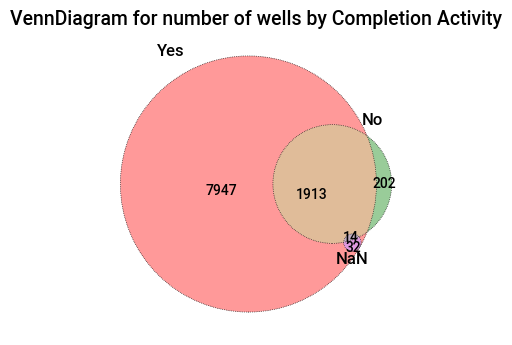

In [28]:
## venn diagram showing intersection of EPAssetsId between Perftreatment (Completion Activity Yes, No or NaN)

if perf_treatment_subset['EPAssetsId'].nunique() > perf_treatment_subset1['EPAssetsId'].nunique():
    v=venn3([set(perf_treatment_subset1['EPAssetsId']), set(perf_treatment_subset2['EPAssetsId']), set(perf_treatment_subset_null_values['EPAssetsId'])], set_labels=['Yes', 'No', 'NaN'])
    c=venn3_circles([set(perf_treatment_subset1['EPAssetsId']), set(perf_treatment_subset2['EPAssetsId']), set(perf_treatment_subset_null_values['EPAssetsId'])], linestyle='dotted', linewidth=0.5)
    plt.title('VennDiagram for number of wells by Completion Activity', fontsize=14)
    plt.show()
else: 
    print('No wells identified as potential DUC wells')


In [29]:
# calculate number of wells with Completion Activity with only No or NaN

if perf_treatment_subset['EPAssetsId'].nunique() > perf_treatment_subset1['EPAssetsId'].nunique():
    Potential_DUC_wells = perf_treatment_subset['EPAssetsId'].nunique() - perf_treatment_subset1['EPAssetsId'].nunique()
    print('Potential number of DUC wells based on Completion Activity only = ', Potential_DUC_wells)
else: 
    print('No wells identified as potential DUC wells')

Potential number of DUC wells based on Completion Activity only =  202


## Clean wellheader data 

In [30]:
##create list of columns to be dropped

dropcols_wellheader= ['CompletionDate','UnitID', 'UnitFlag', 'UnitName', 'Confidential', 'RegulatoryAgency', 'ConfidentialReleaseDate', 'AbandonDate', 'SurfAbandonDate', 'OSArea', 'OSDeposit', 'Municipality', 'CurrentStatus']

print('well columns to drop as follows:' + ' ')
print(dropcols_wellheader)

well columns to drop as follows: 
['CompletionDate', 'UnitID', 'UnitFlag', 'UnitName', 'Confidential', 'RegulatoryAgency', 'ConfidentialReleaseDate', 'AbandonDate', 'SurfAbandonDate', 'OSArea', 'OSDeposit', 'Municipality', 'CurrentStatus']


In [31]:
## drop columns selected
well_header_df = well_header.drop(columns=dropcols_wellheader, axis=1, inplace=False)

## Check number of rows and columns
well_header_df.shape

(10437, 72)

In [32]:
well_header_df.to_csv(r"C:\Users\ijeke\Documents\Datathon\Complete setWellheader_df")

## Create venn diagram showing intersection between datasets

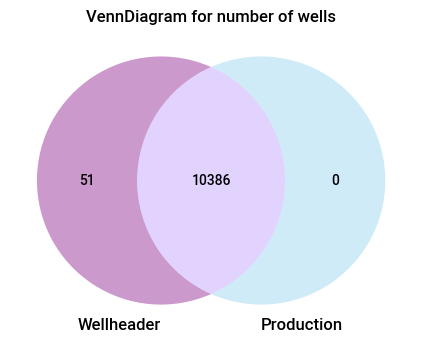

In [33]:
#venn diagram showing intersection of EPAssetsId between Wellheader and Production
venn2_unweighted([set(well_header_df['EPAssetsId']), set(well_production['EPAssetsId'])], set_labels=['Wellheader', 'Production'], set_colors=['purple', 'skyblue'])
#c=venn2_circles([set(well_header_df['EPAssetsId']), set(perf_treatment['EPAssetsId']), set(well_production['EPAssetsId'])], linestyle='dotted', linewidth=1)

plt.title('VennDiagram for number of wells')
plt.show()

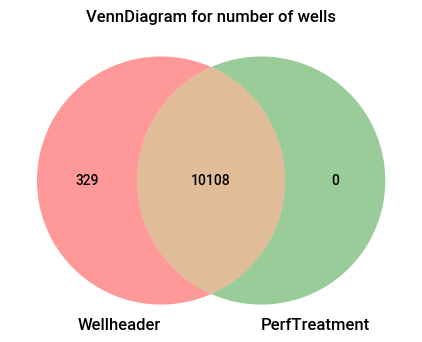

In [34]:
#venn diagram showing intersection of EPAssetsId between Wellheader and PerfTreatment
venn2_unweighted([set(well_header_df['EPAssetsId']), set(perf_treatment['EPAssetsId'])], set_labels=['Wellheader', 'PerfTreatment'])
plt.title('VennDiagram for number of wells')
plt.show()

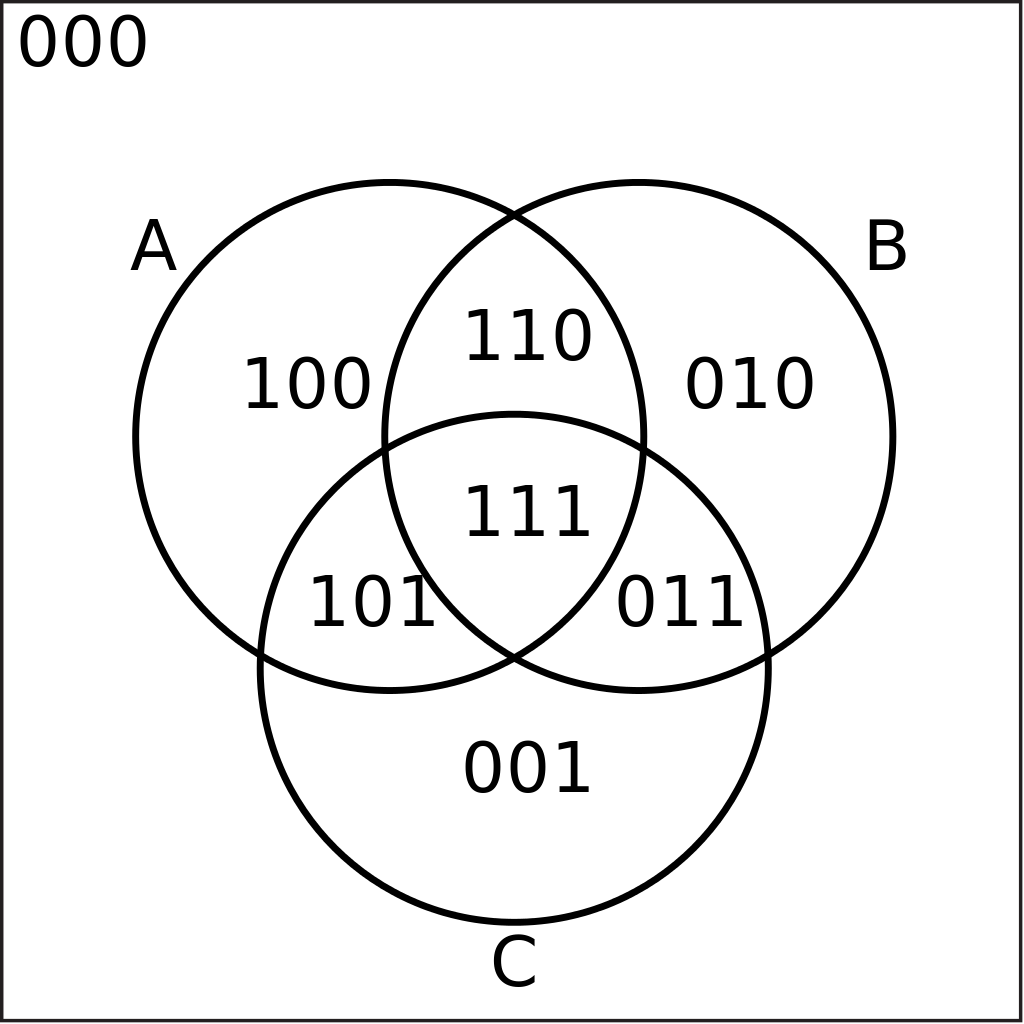

In [35]:
#### Display truth table as venn diagram gotten from 
### Wikepedia at https://en.wikipedia.org/wiki/Venn_diagram#/media/File:Venn3tab.svg to help intrepret chart below. 

from IPython.display import Image
Image(filename="1024px-Venn3tab.svg.png", width=150, height=150)

C:\Users\ijeke\Anaconda3\lib\site-packages\matplotlib_venn\_venn3.py:117: UserWarning: Bad circle positioning
  warnings.warn("Bad circle positioning")


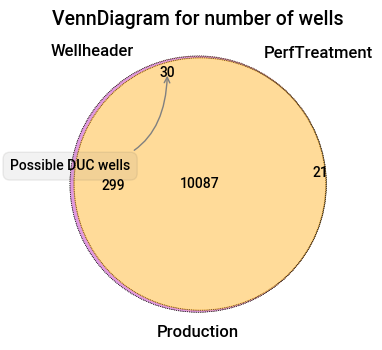

In [36]:
## venn diagram showing intersection of EPAssetsId between Wellheader, Perforation and Production datasets
v=venn3([set(well_header_df['EPAssetsId']), set(perf_treatment['EPAssetsId']), set(well_production['EPAssetsId'])], set_labels=['Wellheader', 'PerfTreatment', 'Production'])
c=venn3_circles([set(well_header_df['EPAssetsId']), set(perf_treatment['EPAssetsId']), set(well_production['EPAssetsId'])], linestyle='dotted', linewidth=0.5)
plt.title('VennDiagram for number of wells', fontsize=14)

#https://en.wikipedia.org/wiki/Venn_diagram (reference for calling id for the venn diagram for customization)
v.get_patch_by_id('111').set_color('orange')
plt.annotate('Possible DUC wells', xy=v.get_label_by_id('100').get_position(),xytext=(-70,-70),
ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5',color='gray'))

plt.show()



#### intrepreting data above 
#### Number of wells common to all three datasets = 10087
#### The number of the wells contained only in the wellheader dataset = 30
#### The number of the wells contained only in the perftreatment dataset = 0 
#### The number of wells contained only in the production dataset = 0
#### The remainder of the wells common to both wellheader and perftreatment only  = 21
#### The remainder of the wells common to both wellheader and production only = 299
#### The remainder of the wells common to both production and perftreatment only = 0

# Modified Dataframes

In [37]:
## add year and month column to the well production data 

well_production['Year'] = well_production['ProdPeriod'].dt.year

well_production['Month'] = well_production['ProdPeriod'].dt.month

well_production['Month_Name'] = well_production['ProdPeriod'].dt.month_name()

## Check for duplicate values in production dataframe 

In [38]:
# check for number of duplicates in the production dataframe
def check_duplicates_in_wellproduction(ProdType):
    x = well_production[well_production['ProdType']== ProdType]
    y = x[x.duplicated(subset=['EPAssetsId', "ProdPeriod"])]
    print(y['EPAssetsId'].nunique())

duplicate_values_for_gas_production = check_duplicates_in_wellproduction('Gas Production (MMcf)')
print('\n')
duplicate_values_for_prod_hrs = check_duplicates_in_wellproduction('Production Hours')
print('\n')
duplicate_values_for_oil_production = check_duplicates_in_wellproduction('Oil Production (Bbls)')
print('\n')
duplicate_values_for_water_production = check_duplicates_in_wellproduction('Water Production (Bbls)')
print('\n')
duplicate_values_for_condensate_production = check_duplicates_in_wellproduction('Condensate Production (Bbls)')

317


440


378


281


0


In [39]:
# check a duplicate value in the original production dataframe before pivoting

well_production[(well_production['EPAssetsId']== 1164075) & (well_production['ProdType']== 'Production Hours')].sort_values(by=['ProdPeriod'])

,EPAssetsId,ProdPeriod,ProdType,Volume,Year,Month,Month_Name
192637,1164075,2017-05-31,Production Hours,196.0,2017,5,May
87325,1164075,2017-06-30,Production Hours,720.0,2017,6,June
59149,1164075,2017-07-31,Production Hours,744.0,2017,7,July
61413,1164075,2017-08-31,Production Hours,744.0,2017,8,August
90952,1164075,2017-09-30,Production Hours,720.0,2017,9,September
177702,1164075,2017-10-31,Production Hours,456.0,2017,10,October
177391,1164075,2017-10-31,Production Hours,266.0,2017,10,October
93433,1164075,2017-11-30,Production Hours,720.0,2017,11,November
56849,1164075,2017-12-31,Production Hours,744.0,2017,12,December
54362,1164075,2018-01-31,Production Hours,744.0,2018,1,January


In [40]:
# create separate dataframe for production hours

prod_hrs_data = well_production[well_production['ProdType']== 'Production Hours']
prod_hrs_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279435 entries, 0 to 319035
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   EPAssetsId  279435 non-null  int64         
 1   ProdPeriod  279435 non-null  datetime64[ns]
 2   ProdType    279435 non-null  category      
 3   Volume      279435 non-null  float64       
 4   Year        279435 non-null  int64         
 5   Month       279435 non-null  int64         
 6   Month_Name  279435 non-null  object        
dtypes: category(1), datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 15.2+ MB


In [41]:
## group production hours table
prod_hrs = prod_hrs_data.groupby(by=['EPAssetsId', 'ProdType', 'Year', 'Month'], as_index=False, observed=True).agg({'ProdPeriod':'max', 'Volume': 'sum'}) 

In [42]:
# check it for 1164075 for duplicates
prod_hrs[prod_hrs['EPAssetsId']== 1164075].sort_values(by=['ProdPeriod'])

,EPAssetsId,ProdType,Year,Month,ProdPeriod,Volume
122502,1164075,Production Hours,2017,5,2017-05-31,196.0
122503,1164075,Production Hours,2017,6,2017-06-30,720.0
122504,1164075,Production Hours,2017,7,2017-07-31,744.0
122505,1164075,Production Hours,2017,8,2017-08-31,744.0
122506,1164075,Production Hours,2017,9,2017-09-30,720.0
122507,1164075,Production Hours,2017,10,2017-10-31,722.0
122508,1164075,Production Hours,2017,11,2017-11-30,720.0
122509,1164075,Production Hours,2017,12,2017-12-31,744.0
122510,1164075,Production Hours,2018,1,2018-01-31,744.0
122511,1164075,Production Hours,2018,2,2018-02-28,672.0


## Groupby original production dataframe to remove duplicate rows

In [43]:
## groupby original production table 
new_production_table = well_production.groupby(by=['EPAssetsId', 'ProdType', 'Year', 'Month'],as_index=False, observed=True).agg({'ProdPeriod':'max', 'Volume': 'sum'}) 

new_production_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 959619 entries, 0 to 959618
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   EPAssetsId  959619 non-null  int64         
 1   ProdType    959619 non-null  category      
 2   Year        959619 non-null  int64         
 3   Month       959619 non-null  int64         
 4   ProdPeriod  959619 non-null  datetime64[ns]
 5   Volume      959619 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(1), int64(3)
memory usage: 44.8 MB


In [44]:
# check for number of duplicates in the revised production dataframe before pivoting
def check_duplicates_in_newproductiontable(ProdType):
    x = new_production_table[new_production_table['ProdType']== ProdType]
    y = x[x.duplicated(subset=['EPAssetsId', "ProdPeriod"])]
    print(y['EPAssetsId'].nunique())

duplicate_values_for_gas_production = check_duplicates_in_newproductiontable('Gas Production (MMcf)')
print('\n')
duplicate_values_for_prod_hrs = check_duplicates_in_newproductiontable('Production Hours')
print('\n')
duplicate_values_for_oil_production = check_duplicates_in_newproductiontable('Oil Production (Bbls)')
print('\n')
duplicate_values_for_water_production = check_duplicates_in_newproductiontable('Water Production (Bbls)')
print('\n')
duplicate_values_for_condensate_production = check_duplicates_in_newproductiontable('Condensate Production (Bbls)')

0


0


0


0


0


In [45]:
new_production_pivot= new_production_table.pivot_table(index=['EPAssetsId', 'Year', 'Month','ProdPeriod'], columns='ProdType', values='Volume', aggfunc=np.sum, observed=True)

new_production_pivot.head()

ProdType                          Condensate Production (Bbls)  \
EPAssetsId Year Month ProdPeriod                                 
3373       2017 8     2017-08-31                           NaN   
                9     2017-09-30                    3744.94692   
                10    2017-10-31                    3792.12042   
                11    2017-11-30                    5577.16566   
                12    2017-12-31                    4994.73018   

ProdType                          Gas Production (MMcf)  \
EPAssetsId Year Month ProdPeriod                          
3373       2017 8     2017-08-31               2.330777   
                9     2017-09-30              55.009864   
                10    2017-10-31              48.999285   
                11    2017-11-30              58.516624   
                12    2017-12-31              77.385321   

ProdType                          Oil Production (Bbls)  Production Hours  \
EPAssetsId Year Month ProdPeriod                                            
3373       2017 8     2017-08-31                    NaN              60.0   
                9     2017-09-30                    NaN             499.2   
                10    2017-10-31                    NaN             417.6   
                11    2017-11-30                    NaN             619.2   
                12    2017-12-31                    NaN             662.4   

ProdType                          Water Production (Bbls)  
EPAssetsId Year Month ProdPeriod                           
3373       2017 8     2017-08-31                      NaN  
                9     2017-09-30               2213.38062  
                10    2017-10-31               2327.22600  
                11    2017-11-30               2127.21036  
                12    2017-12-31               2403.96156

In [46]:
new_wp_pivot=sv.analyze(new_production_pivot)

:FEATURES DONE:                    |█████████████████████| [100%]   00:02  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [47]:
new_wp_pivot.show_html('new_wp.html')

Report new_wp.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.
